### Kaggle Bike Sharing Demand: Data Pre-processing

In this notebook, we will train a model that predicts bike sharing demand. This was Kaggle compition. You can download the data from https://www.kaggle.com/c/bike-sharing-demand/data


<h3>Objective:</h3> 
<quote>You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period (Ref: Kaggle.com)</quote>

####  Load Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Input Features: ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek']
       
Target Feature: ['count']


In [2]:
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek']

In [3]:
df = pd.read_csv('train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('test.csv', parse_dates=['datetime'])

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
# We need to convert datetime to numeric for training.
# Let's extract key features into separate numeric columns
   
def add_features(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour

In [8]:
add_features(df)
add_features(df_test)

In [9]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


In [10]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


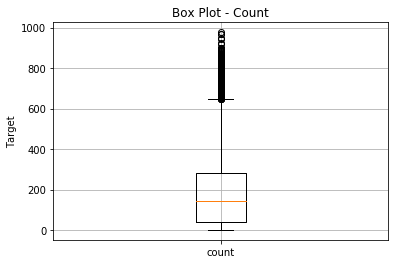

In [11]:
plt.boxplot([df['count']], labels=['count'])
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)

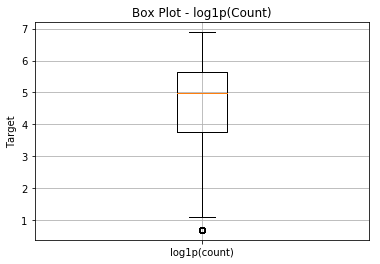

In [12]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.boxplot([df['count'].map(np.log1p)], labels=['log1p(count)'])
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

In [13]:
df["count"] = df["count"].map(np.log1p)

In [14]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [15]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [16]:
df.corr()['count']

season        0.160452
holiday      -0.001231
workingday   -0.015326
weather      -0.108005
temp          0.376587
atemp         0.372167
humidity     -0.333158
windspeed     0.122754
casual        0.579034
registered    0.792129
count         1.000000
year          0.178236
month         0.163731
day           0.019008
dayofweek     0.027265
hour          0.570638
Name: count, dtype: float64

In [17]:
group_month = df.groupby(['month'])

In [18]:
average_by_month = group_month['count'].mean()

Text(0.5,1,'Rental Count by Month')

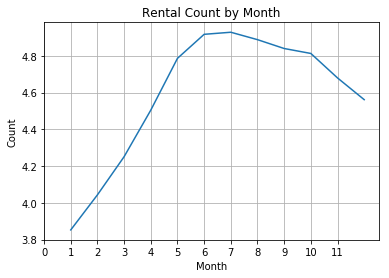

In [19]:
plt.plot(average_by_month.index,average_by_month)
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(np.arange(12))
plt.grid(True)
plt.title('Rental Count by Month')

In [20]:
group_year_month = df.groupby(['year','month'])

In [21]:
average_year_month = group_year_month['count'].mean()

Text(0.5,1,'Rental Count by Year,Month')

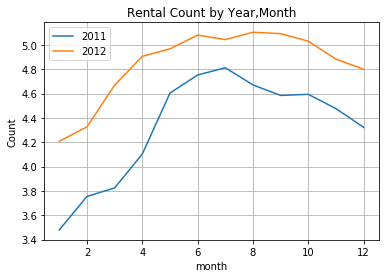

In [22]:
for year in average_year_month.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    plt.plot(average_year_month[year].index,average_year_month[year],label=year)
    
plt.legend()    
plt.xlabel('month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Rental Count by Year,Month')

Text(0,0.5,'Count')

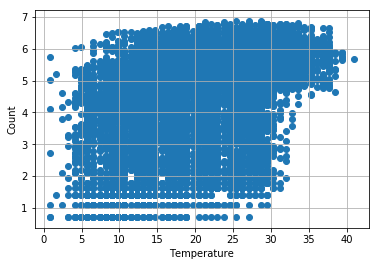

In [23]:
plt.scatter(x=df.temp,y=df["count"],label='Temperature')
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Count')

Text(0,0.5,'Count')

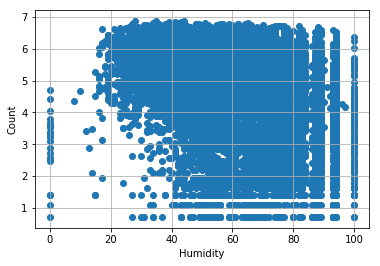

In [24]:
plt.scatter(x=df.humidity,y=df["count"],label='Humidity')
plt.grid(True)
plt.xlabel('Humidity')
plt.ylabel('Count')

Text(0.5,1,'Rental Count Average by hour')

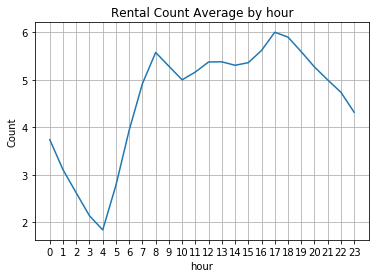

In [25]:
group_hour = df.groupby(['hour'])
average_by_hour = group_hour['count'].mean()


plt.plot(average_by_hour.index,average_by_hour)
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental Count Average by hour')

Text(0.5,1,'Rental Count Average by Year,Hour')

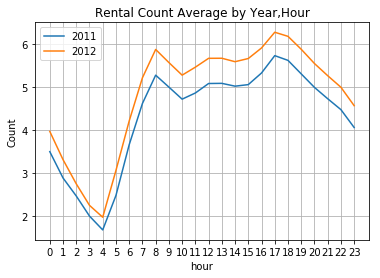

In [26]:
group_year_hour = df.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()

for year in average_year_hour.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)
    
plt.legend()    
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental Count Average by Year,Hour')

Text(0.5,1,'Rental Count Average by Working Day,Hour')

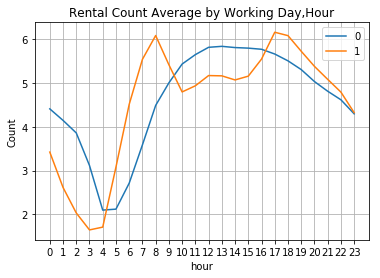

In [27]:
group_workingday_hour = df.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()

for workingday in average_workingday_hour.index.levels[0]:
    #print (year)
    #print(average_year_month[year])
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],label=workingday)
    
plt.legend()    
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Rental Count Average by Working Day,Hour')

In [28]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                float64
year                   int64
month                  int64
day                    int64
dayofweek              int64
hour                   int64
dtype: object

In [29]:
# Save all data
df.to_csv('bike_all.csv',index=False,
          columns=columns)

## Training and Validation Set
### Target Variable as first column followed by input features
### Training, Validation files do not have a column header

In [30]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [31]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [32]:
rows, train, test

(10886, 7620, 3265)

In [33]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek']

In [34]:
# Write Training Set
df[:train].to_csv('bike_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [35]:
# Write Validation Set
df[train:].to_csv('bike_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [36]:
# Test Data has only input features
df_test.to_csv('bike_test.csv',index=False)

In [37]:
','.join(columns)

'count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek'

In [38]:
# Write Column List
with open('bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

In [35]:
df_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek',
       'hour'],
      dtype='object')

In [36]:
df_test['season'].unique()

array([1, 2, 3, 4])

In [37]:
df_test['holiday'].unique()

array([0, 1])

In [38]:
df_test['workingday'].unique()

array([1, 0])

In [39]:
df_test['weather'].unique()

array([1, 2, 3, 4])

In [40]:
df_test['temp'].unique()

array([10.66,  9.84,  9.02, 11.48, 12.3 , 13.12,  8.2 ,  6.56,  5.74,
        4.92,  4.1 ,  3.28,  2.46,  1.64,  0.82,  7.38, 13.94, 14.76,
       17.22, 15.58, 16.4 , 21.32, 22.14, 22.96, 18.86, 18.04, 19.68,
       20.5 , 23.78, 25.42, 27.06, 28.7 , 30.34, 31.16, 27.88, 24.6 ,
       26.24, 29.52, 31.98, 33.62, 32.8 , 35.26, 36.08, 36.9 , 34.44,
       37.72, 38.54, 39.36, 40.18])

In [41]:
df_test['atemp'].unique()

array([11.365, 13.635, 12.88 , 10.605, 16.665, 14.395, 15.15 , 15.91 ,
       12.12 ,  9.85 ,  9.09 ,  8.335,  7.575,  6.06 ,  6.82 ,  5.305,
        3.79 ,  1.515,  2.275,  0.   ,  0.76 ,  3.03 ,  4.545, 17.425,
       18.18 , 21.21 , 19.695, 20.455, 25.   , 25.76 , 26.515, 22.725,
       21.97 , 23.485, 24.24 , 27.275, 30.305, 31.06 , 32.575, 33.335,
       31.82 , 29.545, 28.79 , 28.03 , 34.09 , 34.85 , 37.12 , 38.635,
       37.88 , 36.365, 35.605, 40.15 , 39.395, 41.665, 40.91 , 42.425,
       43.18 , 44.695, 46.21 , 45.455, 47.725, 49.24 , 50.   , 43.94 ,
       18.94 ])

In [42]:
df_test['humidity'].unique()

array([ 56,  60,  55,  52,  48,  45,  42,  49,  65,  70,  75,  80,  87,
        51,  47,  41,  27,  21,  25,  26,  28,  30,  33,  38,  44,  35,
        57,  62,  58,  54,  46,  43,  37,  36,  40,  50,  59,  63,  64,
        69,  74,  86,  93,  61,  29,  53,  66,  81,  76,  72, 100,  94,
        77,  96,  82,  88,  39,  34,  32,  71,  90,  23,  24,  31,  22,
        20,  83,  78,  73,  67,  68,  89,  79,  84,  18,  17,  16,  19,
        85])

In [43]:
df_test['windspeed'].unique()

array([26.0027,  0.    , 11.0014, 15.0013, 19.0012, 19.9995,  7.0015,
        8.9981, 12.998 , 22.0028, 16.9979,  6.0032, 27.9993, 23.9994,
       31.0009, 39.0007, 35.0008, 30.0026, 36.9974, 40.9973, 54.002 ,
       50.0021, 32.9975, 43.0006, 55.9986, 46.0022, 43.9989])

In [44]:
df_test['year'].unique()

array([2011, 2012])

In [45]:
df_test['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
df_test['day'].unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [47]:
df_test.shape

(6493, 14)